In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# Load dataset
df = pd.read_csv("/content/customer_churn.csv")

In [4]:
# Drop Customer_ID (not useful for prediction)
df = df.drop("Customer_ID", axis=1)

In [5]:
# Encode Churn (Yes/No → 1/0)
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

In [6]:
# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Decision Tree (CART)
cart_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

In [9]:
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
# Accuracy
score = cart_model.score(X_test, y_test)
print(f"\nModel Accuracy: {score * 100:.2f}%")


Model Accuracy: 53.50%


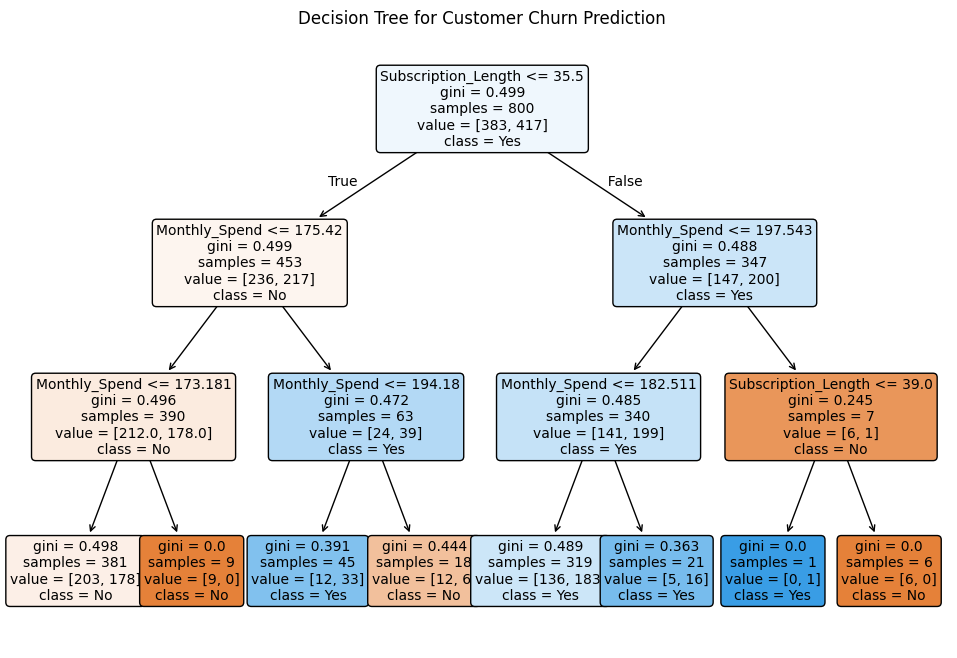

In [11]:
# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(
    cart_model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Customer Churn Prediction")
plt.show()